In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"

pd.set_option("Display.max_columns", 60)

In [3]:
#Read in data from Public Health Infobase - Data on COVID-19 in Canada
path = '/Users/oseadeleke/Documents/DS/Projects/COVID-19 Data Visualization/Datasets/covid19-download.csv'
df= pd.read_csv(path)
df.head()

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,Ontario,2020-01-31,NaN,3,0,0.0,3,NaN,NaN,NaN,NaN,3,300.0,0.02,0.0,0.0,0.0,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,2020-01-31,NaN,1,0,0.0,1,NaN,NaN,NaN,NaN,1,100.0,0.02,0.0,0.0,0.0,NaN,NaN,100.0,1.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Canada,Canada,2020-01-31,NaN,4,0,0.0,4,NaN,NaN,NaN,NaN,4,400.0,0.01,0.0,0.0,0.0,NaN,NaN,100.0,4.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35,Ontario,Ontario,2020-02-08,NaN,3,0,0.0,3,NaN,NaN,NaN,NaN,0,0.0,0.02,0.0,0.0,0.0,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59,British Columbia,Colombie-Britannique,2020-02-08,NaN,4,0,0.0,4,NaN,NaN,NaN,NaN,3,300.0,0.08,0.0,0.0,0.0,NaN,NaN,100.0,4.0,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Extract columns to be used in creating visualizations
data= df.loc[:, ['pruid', 'prname', 'date','numtested', 'numconf', 'numdeaths', 'numrecover']]
data.shape

(4932, 7)

In [5]:
#Parse date column so python is able to recognize it as datetime type
data['parsed_date'] = pd.to_datetime(data['date'])

In [6]:
#Rename columns
data.rename(columns={'numtested':'tested', 'prname':'province', 'numconf': 'confirmed', 'numdeaths':'deaths', 'numrecover':'recovered'}, inplace=True)

In [7]:
#Extract location = 'Canada' to seperate total country cases from province cases
canada = data.loc[data['province'] == 'Canada']
canada.rename(columns={'province':'location'}, inplace=True)
canada.shape

(341, 8)

In [8]:
#Drop province = 'Canada' cases from data 
data.drop(data[data['province'] == 'Canada'].index, inplace=True)

In [9]:
#Melt canada dataframe 
canada_melt = pd.melt(canada, id_vars='parsed_date', value_vars=['confirmed', 'deaths', 'recovered'])
canada_melt.head()

,parsed_date,variable,value
0,2020-01-31,confirmed,4.0
1,2020-02-08,confirmed,7.0
2,2020-02-16,confirmed,8.0
3,2020-02-21,confirmed,9.0
4,2020-02-24,confirmed,10.0


In [10]:
#Create lineplot to show Confirmed/Deaths/Recovered over time in Canada
fig = px.line(canada_melt, x='parsed_date', y='value', color='variable', labels={'parsed_date':'Date', 'value': 'Value'}, title="Confirmed/Deaths/Recovered across Canada as of 2021-01-29")
fig.show()

Text(0, 0.5, 'Confirmed')

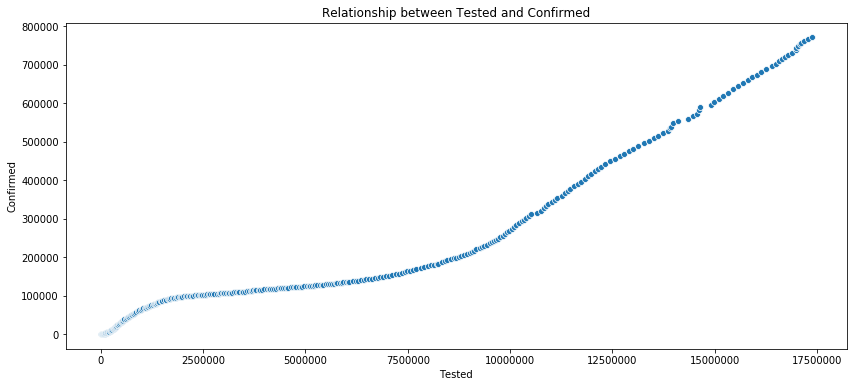

In [11]:
#Plot relationship between numtested and numconfirmed

fig, ax = plt.subplots(figsize=(14,6))
plt.title("Relationship between Tested and Confirmed")
plt.ticklabel_format(style='Plain')
sns.scatterplot(x='tested', y='confirmed', data=canada)
plt.xlabel("Tested")
plt.ylabel("Confirmed")

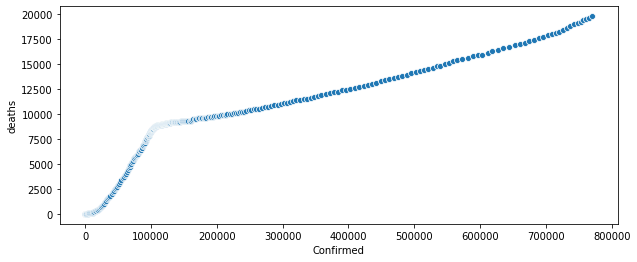

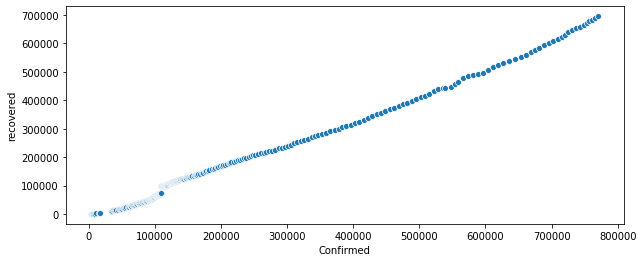

In [12]:
#Plot relationship between Confirmed and Deaths, Recovered
cases= canada[['deaths', 'recovered']]

for i in cases.columns:
    plt.figure(figsize=(10,4))
    sns.scatterplot(x=canada['confirmed'], y=cases[i])
    plt.xlabel("Confirmed")
    plt.show()

In [14]:
#Extract current number of cases
provinces = data.loc[data['parsed_date'] == '2021-01-29']

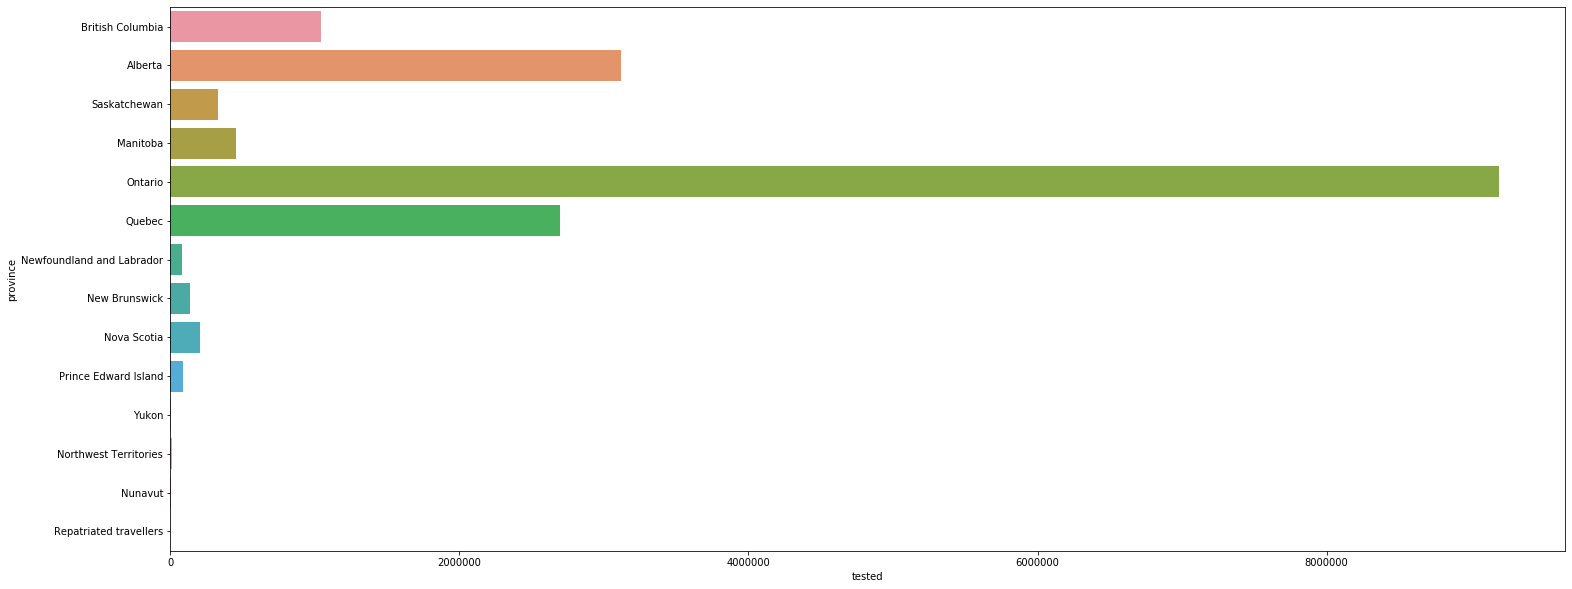

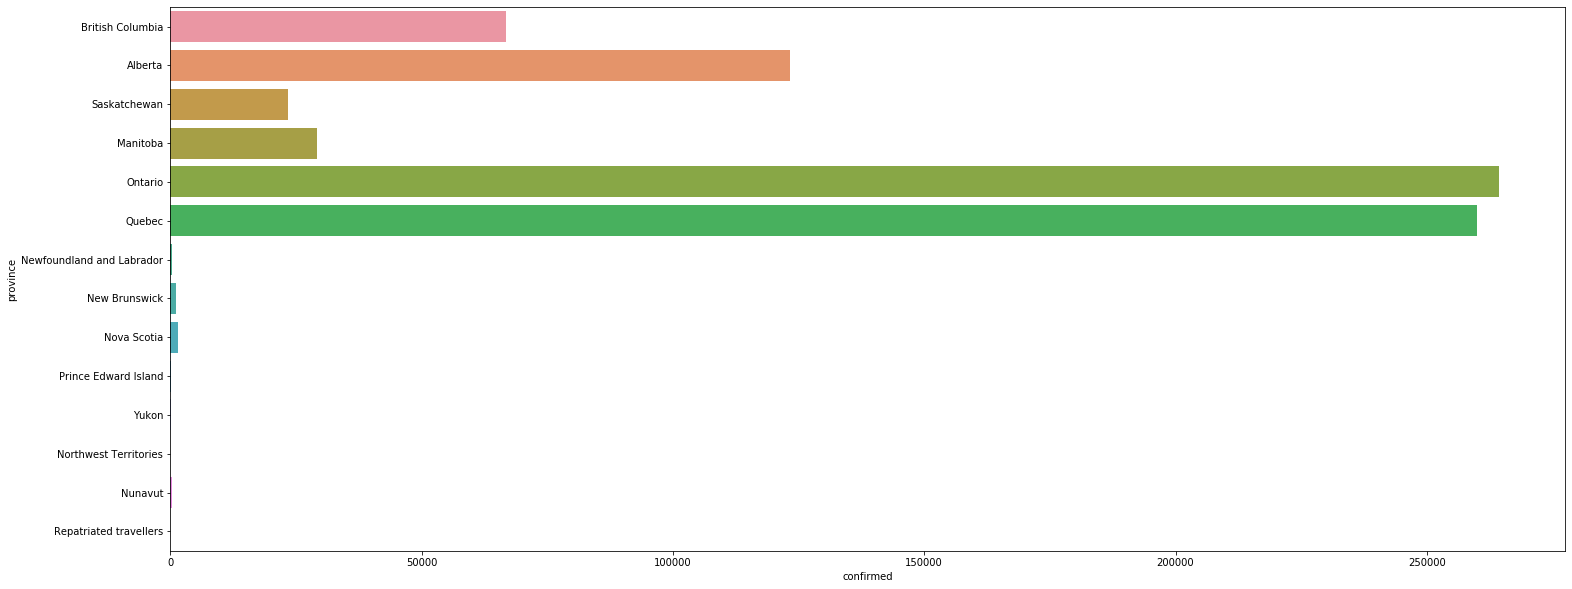

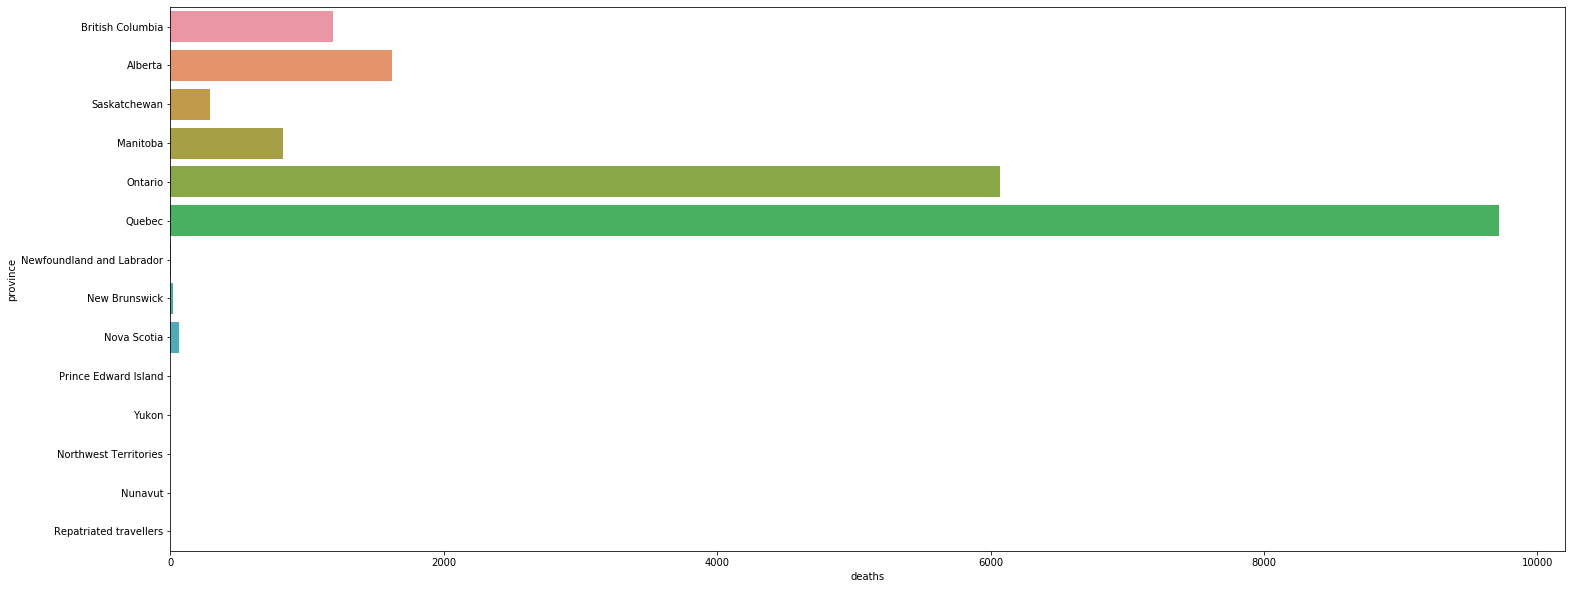

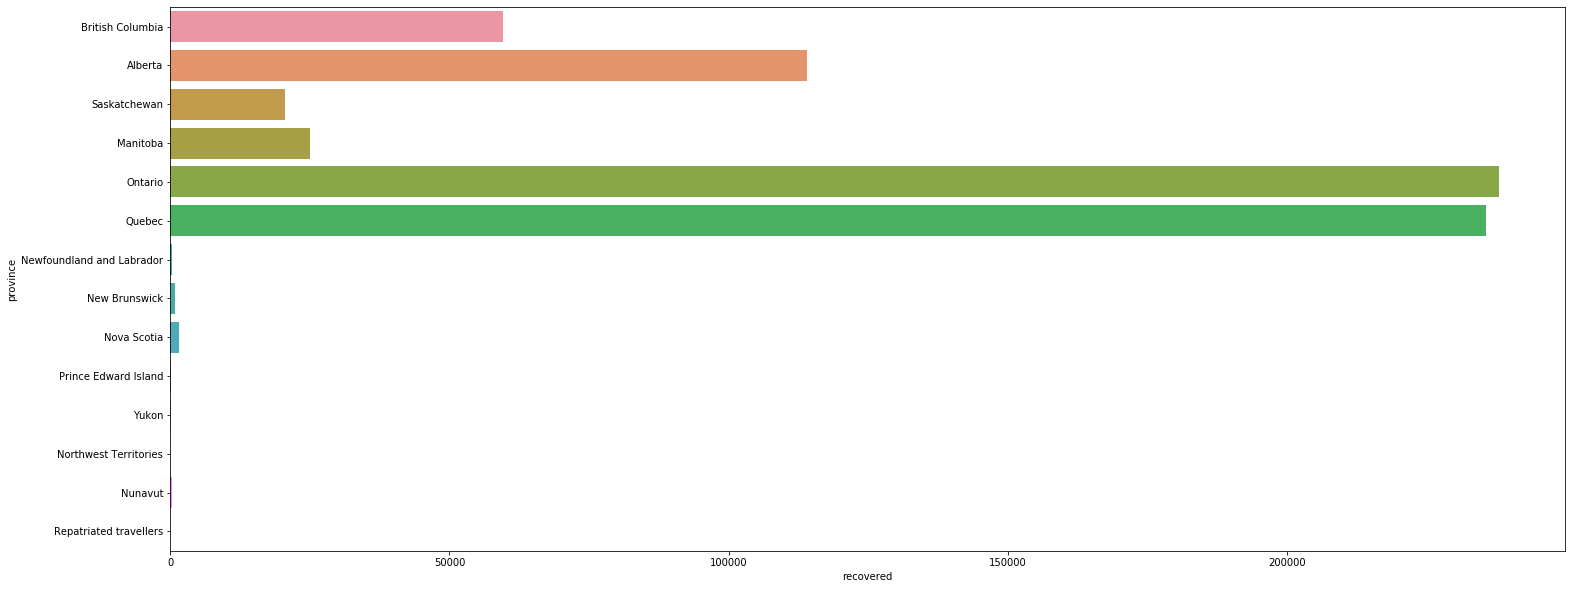

In [15]:
#Plot Tests Completed/Confirmed/Deaths/Recovered cases across provinces
pcases= provinces[['tested', 'confirmed', 'deaths', 'recovered']]

for i in pcases:
    plt.figure(figsize=(25,10))
    sns.barplot(x=pcases[i], y=provinces['province'])
    plt.show()